In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import warnings
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', font_scale=1.3)

In [2]:
EXPERIMENTS = 1000
SAMPLE_SIZE = 50
metrics = np.zeros((3, EXPERIMENTS))

rng = np.random.default_rng()
n, p = 1000, .5  # number of trials, probability of each trial

for i in range(metrics.shape[1]):
    x = rng.binomial(n, p, SAMPLE_SIZE)
    metrics[:, i] = [x.mean(), x.var(), np.quantile(x, 0.5)]

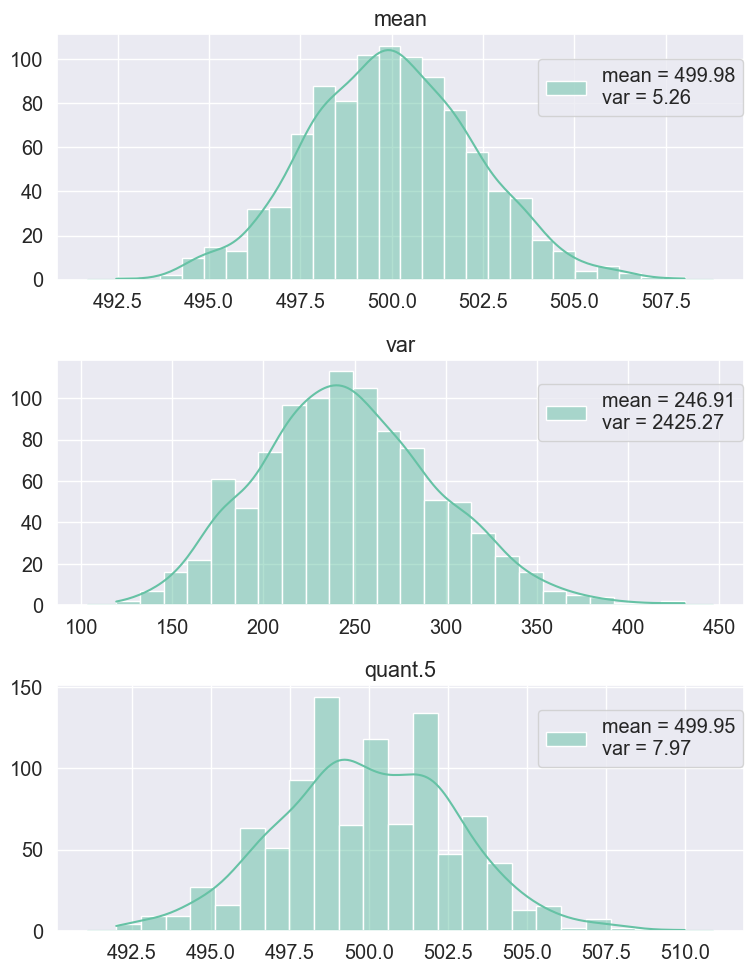

In [3]:
with warnings.catch_warnings(record=True):
    fig = plt.figure(figsize=(8, 10))
    axs = fig.subplots(3)
    for i, name in enumerate(['mean', 'var', 'quant.5']):
        mean = metrics[i].mean()
        var = metrics[i].var()
        sns.histplot(metrics[i], ax=axs[i], kde=True,
                     label="mean = {:.2f}\nvar = {:.2f}".format(mean, var))
        x0, x1 = axs[i].get_xlim()
        x_pdf = np.linspace(x0, x1, 100)
        y_pdf = scipy.stats.norm.pdf(x_pdf)
        sns.lineplot(x=x_pdf, y=y_pdf, ax=axs[i])
        axs[i].set_ylabel("")
        axs[i].set_title(name)
        axs[i].legend()
        axs[i].legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0)
        
    
    fig.tight_layout()

In [4]:
x = rng.gamma(1, 1, 10)
x

array([1.52723588, 0.92490847, 2.50580855, 0.36925004, 1.37207885,
       0.17749525, 0.19905586, 0.54779121, 0.10568861, 1.90618062])